In [27]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

In [126]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

* **satisfaction_level** уровень удовлетворенности
* **last_evaluation** последняя оценка
* **number_project** номер проекта 
* **average_montly_hours** средние часы в месяц
* **time_spend_company** стаж в компании(лет)
* **Work_accident** несчастный случай на работе
* **left** уволен 
* **promotion_last_5years** повышение за последние пять лет 
* **sales** отдел
* **salary** зарплата

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [11]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [12]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [13]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [15]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [16]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

Мода показывает какое знаечение встречается чаще всего, у среднеотработанных часов в месяц две моды, у большинства людей низкая зарплата.
Стан.оклонение показывает как распределены значения в нашей выборке, относительно среднего. Значения близкие к 0, говорит о надежности среднего.

Рассчитать и визуализировать корреляционную матрицу для переменных

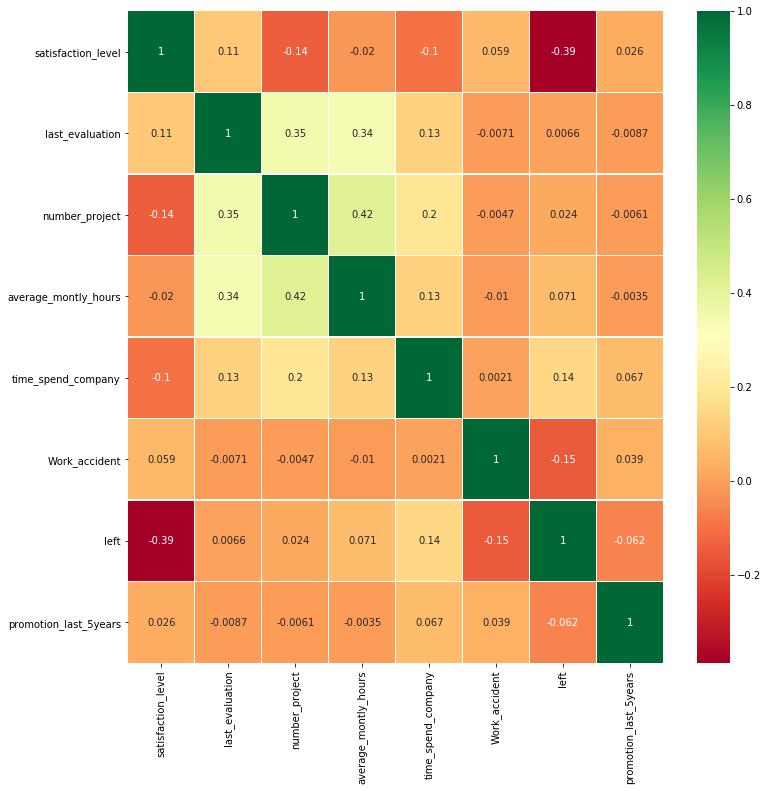

In [28]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Смотря на матрицу корреляция, сказать что есть какая то сильлная зависимость нельзя, есть небольшая зависимость между уволенными сотрудниками и их уровнем удовлетворенности.


Визуализировать несколько взаимосвязей между переменными

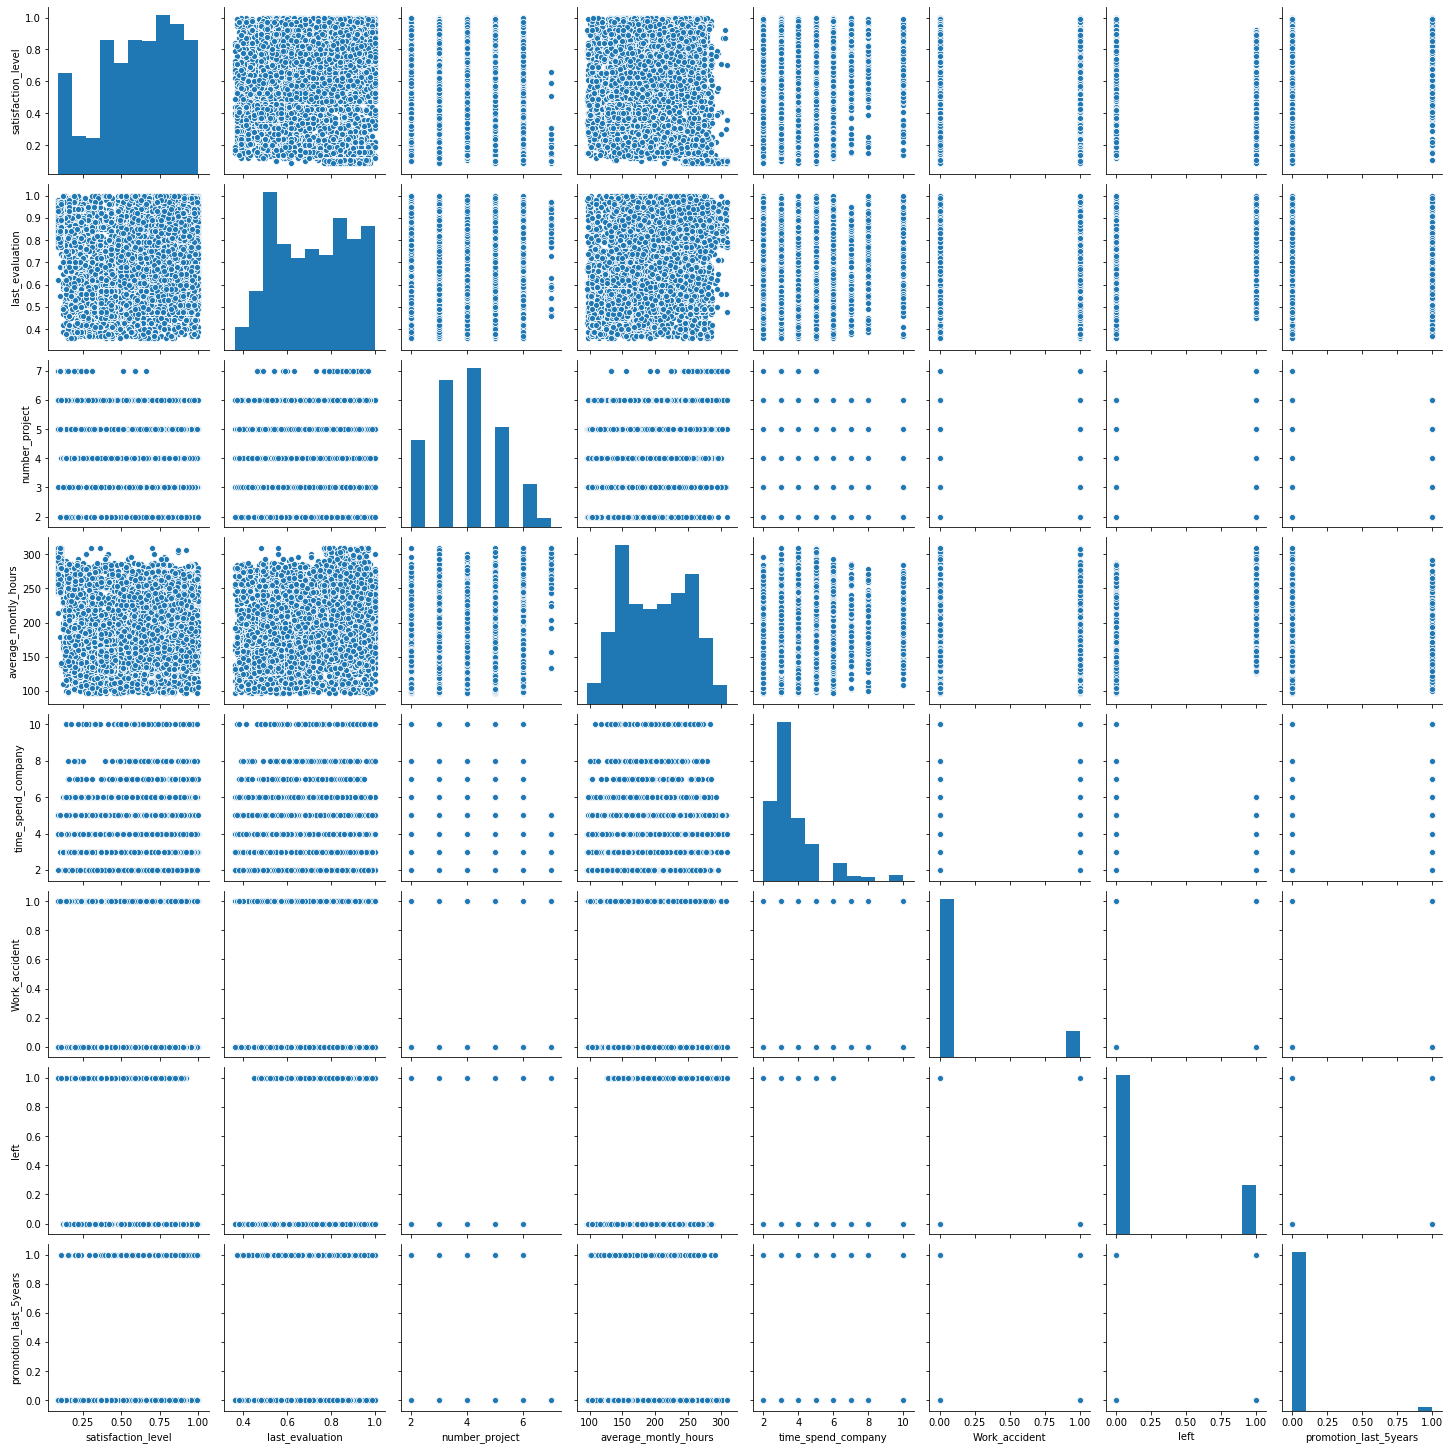

In [33]:
g = sns.pairplot(data)

Можно сказать что у уволенных уровень удовлетворенности ниже, по сравнению с теми кто работает, что логично. Уволенные сотрудники работали больше остальных, можно предположить, что увольнения связаны с тем, что не спавляются со своей работой.


С использованием t-test статистики проверить взаимосвязи между несколькими переменными
проверим взаимосвязь между ур.удовлетворенности, уволенными и остальными сотрудниками


In [37]:
left = data[data['left']==0]['satisfaction_level']

work = data[data['left']==1]['satisfaction_level']

print(stats.ttest_ind(left, work))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


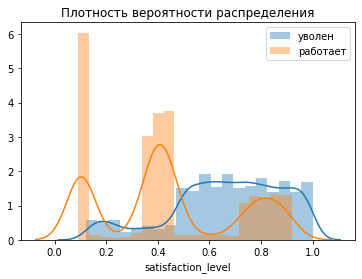

In [43]:
sns.distplot(left, 20)
sns.distplot(work, 20)
plt.title('Плотность вероятности распределения')
plt.legend(['уволен', 'работает'])
plt.show()

p-value равно 0.0, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между уровнем удовлетворённости работающих и уволенных.

теперь посмотрим связь между повышением сотруника и стажем раоты

In [65]:
data['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [67]:
x  =data[data['promotion_last_5years']==1]['time_spend_company']

y = data[data['promotion_last_5years']==0]['time_spend_company']

print(stats.ttest_ind(x, y))

Ttest_indResult(statistic=8.276826662049707, pvalue=1.3707265265559122e-16)


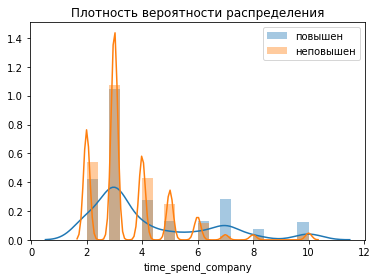

In [69]:
sns.distplot(x, 20)
sns.distplot(y, 20)
plt.title('Плотность вероятности распределения')
plt.legend(['повышен', 'неповышен'])
plt.show()

p-value равно 1,3, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между повышением и стажем работы

Рассчитать сколько работников работает в каждом департаменте

In [128]:
dep = data.reset_index()
dep = dep.loc[(data.left == 0)]
dep = dep[['sales', 'index']].groupby('sales').count()
dep


,index
sales,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


Показать распределение сотрудников по зарплатам


In [109]:
data[['salary', 'index']].groupby('salary').count()

,index
salary,
high,1155
low,5144
medium,5129


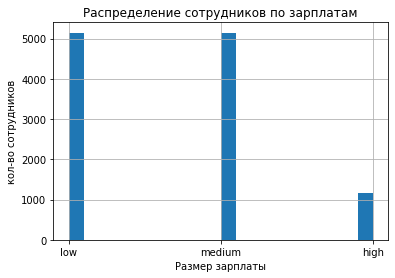

In [112]:
plt.hist(data['salary'],20)
plt.xlabel('Размер зарплаты')
plt.ylabel('кол-во сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.grid(True)
plt.show()

Показать распределение сотрудников по зарплатам совместно с департаментами


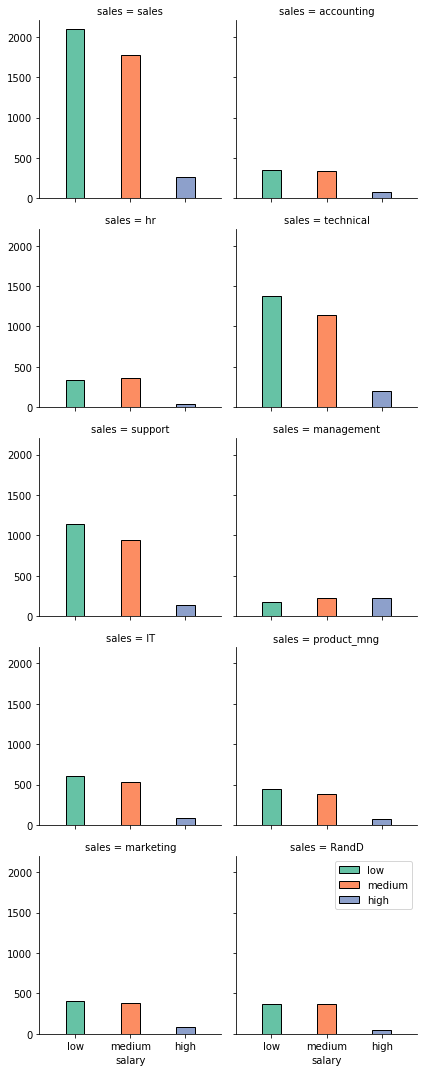

In [115]:
bins = 3
g = sns.FacetGrid(df, col="sales", hue="salary", palette="Set2", col_wrap=2)
g.map(plt.hist, 'salary', bins=bins, ec="k")
plt.legend(['low', 'medium', 'high'])

Сколько сотрудников покинули компанию


In [135]:
print(data.loc[(data.left == 1)].count()[0], 'сотрудник покинул компанию')

3571 сотрудник покинул компанию


Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию


посмотрим влияет ли зарплата на увольнение сотрудников 

In [161]:
left2 = data[data['salary']=='low']['left']
stats.ttest_1samp(left2, data['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

большой p-value говорит о том что среди уволенных людей много тех у кого зарплатат низкая

Теперь построим модель деревья решений.
задача посмотреть причины ухода из компании

Для начала переведем тектовые значения в числа

In [183]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [252]:
for i in data["sales"]:
    if i == "sales":
        data["sales"] = 1
    elif i == "accounting":
        data["sales"] = 2
    elif i == "hr":
        data["sales"] = 3       
    elif i == "technical":
        data["sales"] = 4    
    elif i == "support":
        data["sales"] = 5        
    elif i == "management":
        data["sales"] = 6  
    elif i == "IT":
        data["sales"] = 7  
    elif i == "product_mng":
        data["sales"] = 8  
    elif i == "RandD":
        data["sales"] = 9  
    else:
        data["sales"] = 10

In [253]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,10,1
1,0.80,0.86,5,262,6,0,1,0,10,1
2,0.11,0.88,7,272,4,0,1,0,10,1
3,0.72,0.87,5,223,5,0,1,0,10,1
4,0.37,0.52,2,159,3,0,1,0,10,1


In [254]:
for x in data["salary"]:
    if x == "low":
        data["salary"] = 1
    elif x == "medium":
        data["salary"] = 2
    else:
        data["salary"] = 3

In [255]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,10,3
1,0.80,0.86,5,262,6,0,1,0,10,3
2,0.11,0.88,7,272,4,0,1,0,10,3
3,0.72,0.87,5,223,5,0,1,0,10,3
4,0.37,0.52,2,159,3,0,1,0,10,3


Теперь нормализуем данные 

In [256]:
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
data_norm.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.362637,-0.46875,-1.0,-0.429907,-0.75,-1.0,1.0,-1.0,-1.0,-1.0
1,0.560440,0.56250,0.2,0.551402,0.00,-1.0,1.0,-1.0,-1.0,-1.0
2,-0.956044,0.62500,1.0,0.644860,-0.50,-1.0,1.0,-1.0,-1.0,-1.0
3,0.384615,0.59375,0.2,0.186916,-0.25,-1.0,1.0,-1.0,-1.0,-1.0
4,-0.384615,-0.50000,-1.0,-0.411215,-0.75,-1.0,1.0,-1.0,-1.0,-1.0


In [257]:
output_y = data.loc[:, ['left']]
input_x = data.drop(data.columns[[6]], axis='columns')

In [258]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
Y=le.fit_transform(output_y)
Y=np.ravel(Y)

C:\FORPIT2\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [259]:
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)

In [260]:

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


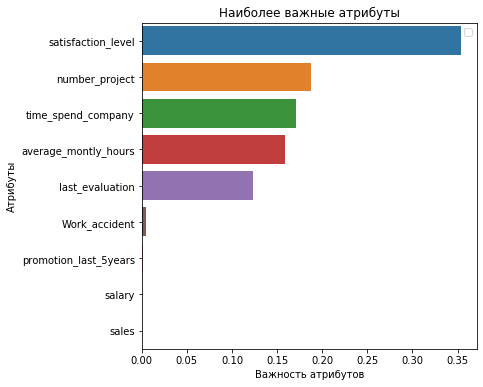

In [261]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

поситаем качество модели

In [199]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3466
           1       0.99      0.97      0.98      1034

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



0.9922222222222222

Модель дала точность предсказания порядка 99%
На удивление уровень зарплаты стоит чуть ли не на последнем месте, и можно сказать то что этот атрибут не влияет на уход сотрудников из компании, хотя выше мы провели паралели между уволенными и низкой зарплатой, самое важное что влияет это уровень увдовлетворенности

In [262]:
stat, p = spearmanr(data['satisfaction_level'], data['left']==1)
print(f'Об этом нам и говорит маленькое p-value, которое равно =  {p:.5f}')

Об этом нам и говорит маленькое p-value, которое равно =  0.00000


gg